## **Step 1** : Importing Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization 

In [1]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# import Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename='Model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## **Step 2** : Data Uploading using Pandas Function

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/anirudhajohare19/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv"

df = pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
84,323.7,282.8,0.0,183.8,10.3,942.7,659.9,3,28.30
877,296.0,0.0,107.0,221.0,11.0,819.0,778.0,28,31.42
639,400.0,0.0,0.0,187.0,0.0,1025.0,745.0,28,43.70
973,143.8,136.3,106.2,178.1,7.5,941.5,774.3,28,26.15
541,333.0,0.0,0.0,192.0,0.0,931.2,842.6,3,15.62
...,...,...,...,...,...,...,...,...,...
912,277.0,117.0,91.0,191.0,7.0,946.0,666.0,28,43.57
38,475.0,0.0,0.0,228.0,0.0,932.0,594.0,90,42.23
997,310.0,142.8,0.0,167.9,10.0,914.3,804.0,28,45.30
217,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,56,38.56


## **Step 3** : Doing Exploratory Data Analysis [EDA] --->

 1. Univariate Analysis

 2. Bi Variate Analysis


In [3]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict ({
        'feature': i,
        'unique_values': df[i].nunique(),
        'Missing_values': df[i].isnull().sum(),
        'Min': df[i].min(),
        '25%': df[i].quantile(0.25),
        'Median': df[i].median(),
        'Max': df[i].max(), 
        'Mean': df[i].mean(),
        'mode' : df[i].mode()[0],
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),

        })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['unique_values', 'Missing_values', 'Min', '25%', 'Median', 'Max', 'Mean', 'mode', 'Standard Deviation', 'Variance', 'Skewness','Kurtosis','IQR'], cmap='coolwarm')


,feature,unique_values,Missing_values,Min,25%,Median,Max,Mean,mode,Standard Deviation,Variance,Skewness,Kurtosis,IQR
0,cement,278,0,102.000000,192.375000,272.900000,540.000000,281.167864,362.600000,104.506364,10921.580220,0.509481,-0.520652,157.625000
1,blast_furnace_slag,185,0,0.000000,0.000000,22.000000,359.400000,73.895825,0.000000,86.279342,7444.124812,0.800717,-0.508175,142.950000
2,fly_ash,156,0,0.000000,0.000000,0.000000,200.100000,54.188350,0.000000,63.997004,4095.616541,0.537354,-1.328746,118.300000
3,water,195,0,121.800000,164.900000,185.000000,247.000000,181.567282,192.000000,21.354219,456.002651,0.074628,0.122082,27.100000
4,superplasticizer,111,0,0.000000,0.000000,6.400000,32.200000,6.204660,0.000000,5.973841,35.686781,0.907203,1.411269,10.200000
5,coarse_aggregate,284,0,801.000000,932.000000,968.000000,1145.000000,972.918932,932.000000,77.753954,6045.677357,-0.040220,-0.599016,97.400000
6,fine_aggregate,302,0,594.000000,730.950000,779.500000,992.600000,773.580485,594.000000,80.175980,6428.187792,-0.253010,-0.102177,93.050000
7,age,14,0,1.000000,7.000000,28.000000,365.000000,45.662136,28.000000,63.169912,3990.437729,3.269177,12.168989,49.000000
8,concrete_compressive_strength,845,0,2.330000,23.710000,34.445000,82.600000,35.817961,33.400000,16.705742,279.081814,0.416977,-0.313725,22.425000


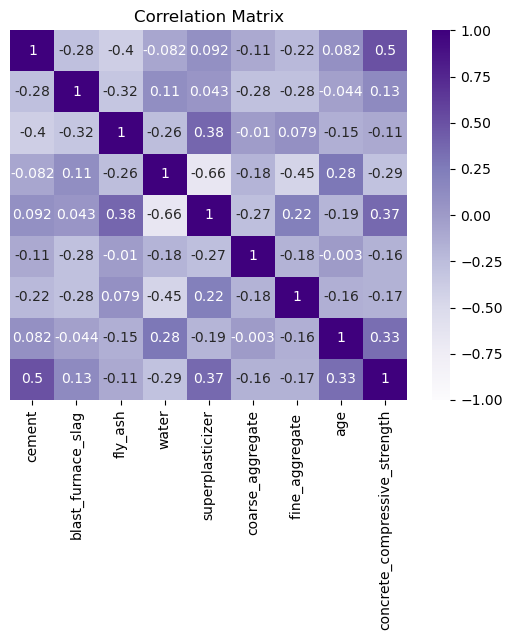

In [4]:
# Chicking Correlation Matrix
# X = Independent Variables
# Y = Dependent Variables -----> ['concrete_compressive_strength']

sns.heatmap(df.corr(), annot = True,yticklabels=False, center = 0,vmax = 1, vmin = -1 ,cmap= 'Purples')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Understanding Features and create New Features Based on Existing Features ----> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

## **Feature Engineering :** 

In [6]:
df['composite_ratio'] = 1/(df['cement'] + df['superplasticizer'] + df['blast_furnace_slag'])/(df['water'])

In [7]:
# df.drop('Composite',axis=1, inplace=True)

In [8]:
df['Cement_to_Water_Ratio'] = 1/(df['cement']/df['water'])

In [9]:
# Use Variance Inflation Factor (VIF) to check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X  = df.drop(columns= ['concrete_compressive_strength'])  # All Independent Variables
X = X.assign(constant=1)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Drop the constant column from the result
vif = vif_data[vif_data['feature']!= 'constant']

# Display the VIF results
print(vif_data)

                  feature          VIF
0                  cement    16.845428
1      blast_furnace_slag    11.328921
2                 fly_ash     6.232357
3                   water     9.040867
4        superplasticizer     2.968025
5        coarse_aggregate     5.098293
6         fine_aggregate      7.034744
7                     age     1.135259
8         composite_ratio     9.827568
9   Cement_to_Water_Ratio     6.959252
10               constant  7502.884687


## **Data Insights :**

1. Higher value Of VIF suggest multicollinearity. [VIF > 10] ----> Column shows multicollinearity

2. Such Columns Must be removed before any Regression Model

In [10]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
composite_ratio                 -0.373830
Cement_to_Water_Ratio           -0.500692
Name: concrete_compressive_strength, dtype: float64

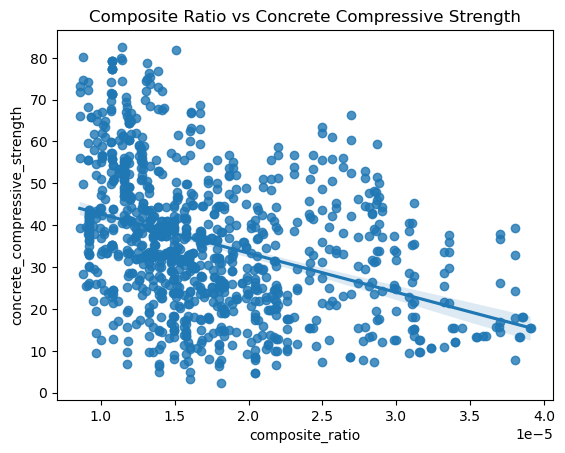

In [11]:
sns.regplot(x = df['composite_ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

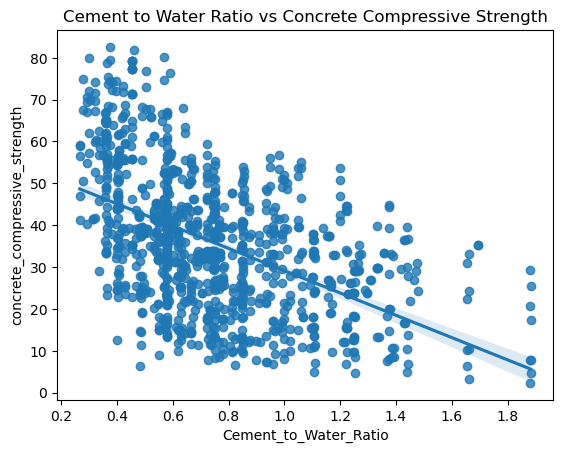

In [12]:
sns.regplot(x = df['Cement_to_Water_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Cement to Water Ratio vs Concrete Compressive Strength')
plt.show()

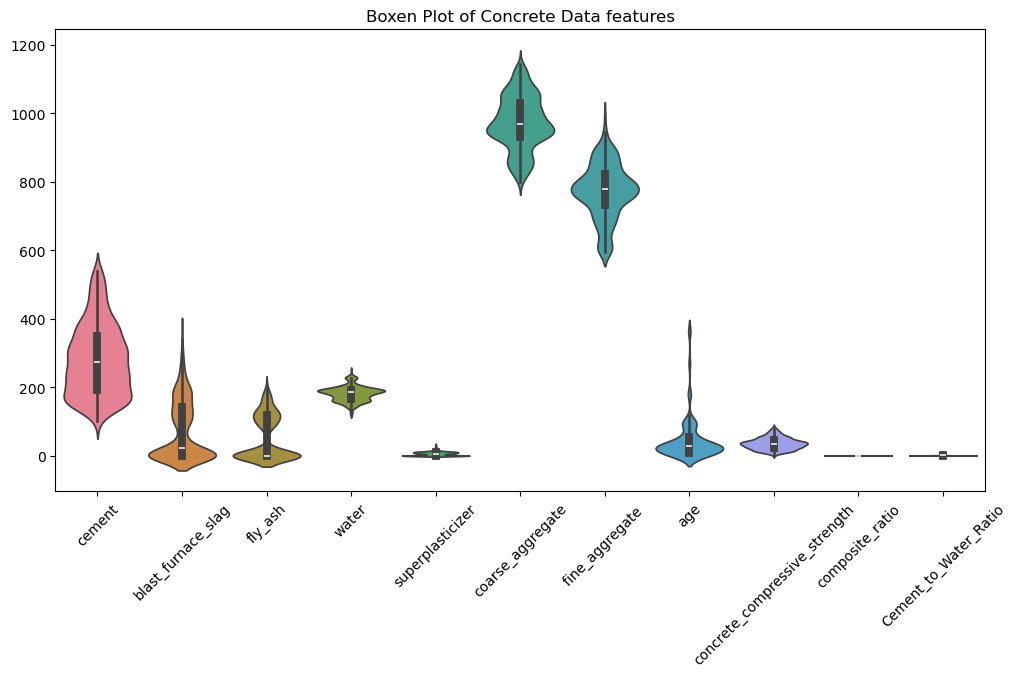

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.xticks(rotation=45) # Rotate X-labels for better readability
plt.title("Boxen Plot of Concrete Data features")
plt.show()

## **Step 4** : 1. Splitting the dataset into Training and Testing Datasets. Also Using Train and Test split to Prevent data Leakage

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns= 'concrete_compressive_strength',axis=1)
y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Usign Scaling Technique 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.6058950475898395

In [17]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

r2_score_RF = r2_score(y_test, y_pred_RF)

r2_score_RF

0.9005491774134485

In [18]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

r2_score_DT = r2_score(y_test, y_pred_DT)

print(f'The R2 Score for Decision Tree Model :{r2_score_DT*100} %')

The R2 Score for Decision Tree Model :85.57053522566669 %


In [19]:
# Checking model's Performance


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_LR = mean_squared_error(y_test, y_pred_LR)
mae_LR = mean_absolute_error(y_test, y_pred_LR)


mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)

print(f'Mean Squared Error for Linear Regression Model :{mse_LR}')
print(f'Mean Absolute Error for Linear Regression Model :{mae_LR}')

print(f'Mean Squared Error for Random Forest Model :{mse_RF}')
print(f'Mean Absolute Error for Random Forest Model :{mae_RF}')

Mean Squared Error for Linear Regression Model :106.63465835021975
Mean Absolute Error for Linear Regression Model :8.17041117821844
Mean Squared Error for Random Forest Model :26.908833355964262
Mean Absolute Error for Random Forest Model :3.6703057466481734


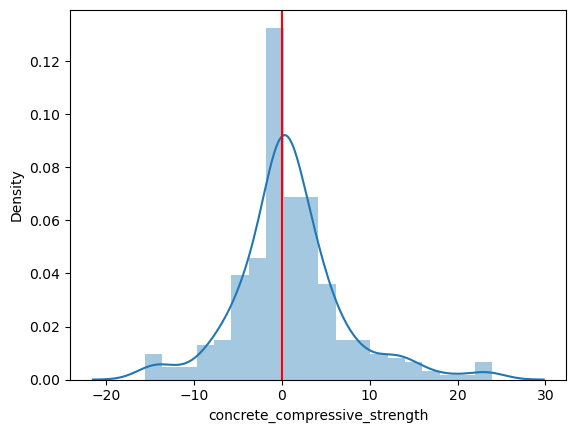

In [20]:
sns.distplot(y_test - y_pred_DT, bins=20)
plt.axvline(0, color='r')

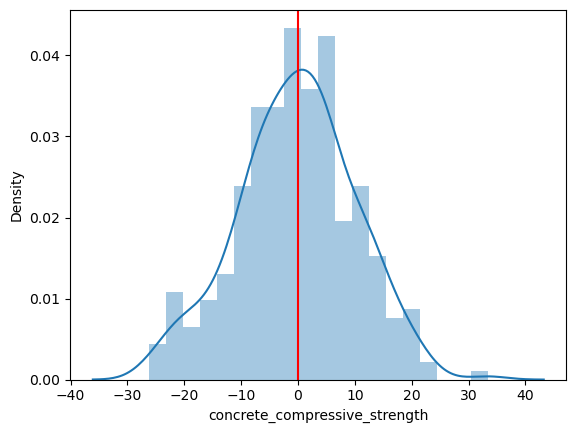

In [21]:
sns.distplot(y_test - y_pred_LR, bins=20)
plt.axvline(0, color='r')

In [22]:
# Using XGB Boosting Algorithm

import xgboost as xgb

XGB = xgb.XGBRegressor()

XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)

r2_score_XGB = r2_score(y_test, y_pred_XGB)

print(f'The R2 Score for XGBoost Model :{r2_score_XGB*100} %')

The R2 Score for XGBoost Model :92.0547581740837 %


In [23]:
from sklearn.ensemble import AdaBoostRegressor

ADA = AdaBoostRegressor()

ADA.fit(X_train, y_train)
y_pred_ADA = ADA.predict(X_test)

r2_score_ADA = r2_score(y_test, y_pred_ADA)

print(f'The R2 Score for AdaBoost Model :{r2_score_ADA*100} %')

The R2 Score for AdaBoost Model :80.97586072752073 %
